In [1]:
import geemap, ee
import geopandas as gpd
try:
        ee.Initialize()
except Exception as e:
        ee.Authenticate()
        ee.Initialize()

In [ ]:
# may need to do median instead of first()

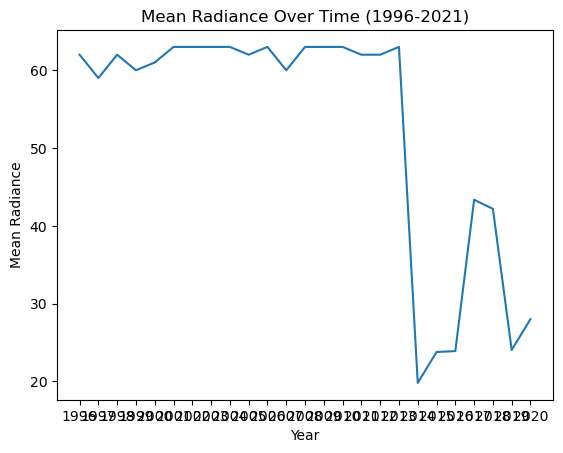

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# initialize the Earth Engine API
ee.Initialize()

# create the ImageCollections
dmsp = ee.ImageCollection("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS")
viirs = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG")

# define the region of interest
islamabad = ee.Geometry.Point([73.0479, 33.6844])

# get the mean radiance values for dmsp from 1996 to 2014
dmsp_dates = []
dmsp_values = []
for year in range(1996, 2014):
    start_date = str(year) + "-01-01"
    end_date = str(year + 1) + "-01-01"
    image = dmsp.filterDate(start_date, end_date).select('stable_lights').first()
    value = image.reduceRegion(reducer=ee.Reducer.mean(),
                                 geometry=islamabad,
                                 scale=100,
                                 maxPixels=1e9
                              ).get('stable_lights').getInfo()
    dmsp_dates.append(str(year))
    dmsp_values.append(value)

# create the dmsp data frame
dmsp_df = pd.DataFrame(data={'date': dmsp_dates, 'mean_radiance': dmsp_values})

# get the mean radiance values for viirs from 2014 to 2021
viirs_dates = []
viirs_values = []
for year in range(2014, 2021):
    start_date = str(year) + "-01-01"
    end_date = str(year + 1) + "-01-01"
    image = viirs.filterDate(start_date, end_date).select('avg_rad').first()
    value = image.reduceRegion(reducer=ee.Reducer.mean(),
                                 geometry=islamabad,
                                 scale=100,
                                 maxPixels=1e9
                              ).get('avg_rad').getInfo()
    viirs_dates.append(str(year))
    viirs_values.append(value)

# create the viirs data frame
viirs_df = pd.DataFrame(data={'date': viirs_dates, 'mean_radiance': viirs_values})

# combine the two data frames
df = pd.concat([dmsp_df, viirs_df], ignore_index=True)
df.sort_values(by='date', inplace=True)

# plot the graph
plt.plot(df['date'], df['mean_radiance'])
plt.xlabel('Year')
plt.ylabel('Mean Radiance')
plt.title('Mean Radiance Over Time (1996-2021)')
plt.show()
